In [1]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
image_generator = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )   

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/Data-trái-cây/train',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/A.I Training data/Data-trái-cây/validation',
                                                 shuffle=True,
                                                 target_size=(200, 200), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 400 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [5]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #AVGPOOLING
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'],run_eagerly=True)

In [6]:
history=model.fit(train_dataset,batch_size=15,epochs=20,verbose=1,validation_data=validation_dataset)

Epoch 1/20
27/27 [==============================] - 222s 8s/step - loss: 2.5418 - accuracy: 0.2025
Epoch 2/20
27/27 [==============================] - 56s 2s/step - loss: 2.1642 - accuracy: 0.2825
Epoch 3/20
27/27 [==============================] - 56s 2s/step - loss: 2.1375 - accuracy: 0.3225
Epoch 4/20
27/27 [==============================] - 56s 2s/step - loss: 1.9688 - accuracy: 0.3925
Epoch 5/20
27/27 [==============================] - 57s 2s/step - loss: 1.8970 - accuracy: 0.3550
Epoch 6/20
27/27 [==============================] - 56s 2s/step - loss: 1.7887 - accuracy: 0.4675
Epoch 7/20
27/27 [==============================] - 58s 2s/step - loss: 1.6613 - accuracy: 0.4575
Epoch 8/20
27/27 [==============================] - 57s 2s/step - loss: 1.6075 - accuracy: 0.5025
Epoch 9/20
27/27 [==============================] - 57s 2s/step - loss: 1.4380 - accuracy: 0.5100
Epoch 10/20
27/27 [==============================] - 57s 2s/step - loss: 1.5160 - accuracy: 0.5100
Epoch 11/20
27/27 

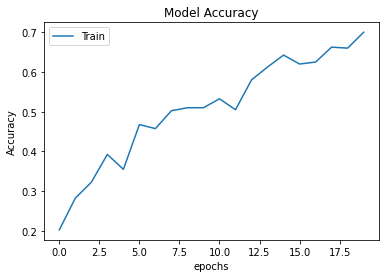

In [7]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

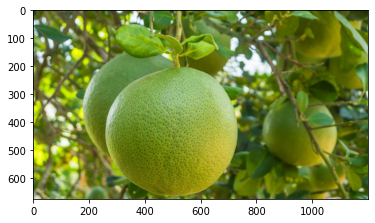

array([3])

In [12]:
filename = 'Buoi.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (200,200))
img = img_to_array(img)
img =  img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis= -1)

In [13]:
model.save('fruit_rec_10epochs.h5')